# Paso 4. Análisis exploratorio de datos (Python)


### 4.1 Leer archivos e importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

print('Viajes en taxi (Nov 15–16 2017)\n\n', df_companies)
print('Viajes promedio por barrio (Nov 2017)\n\n', df_neighborhoods)


Viajes en taxi (Nov 15–16 2017)

                        company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]
Viajes promedio por barrio (Nov 2017)

    dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwoo

### 4.2 Verificar tipos de datos

In [2]:
df_companies.info()
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


parecen correctos

### 4.3 Identificar los 10 principales barrios en términos de finalización del recorrido

In [3]:
top10_neighborhoods = (df_neighborhoods.sort_values('average_trips', ascending=False)
                                       .head(10)
                                       .reset_index(drop=True))

print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### 4.4 Grafico empresas de taxis y número de viajes

                               company_name  trips_amount
0                                 Flash Cab         19558
1                 Taxi Affiliation Services         11422
2                         Medallion Leasing         10367
3                                Yellow Cab          9888
4           Taxi Affiliation Service Yellow          9299
5                 Chicago Carriage Cab Corp          9181
6                              City Service          8448
7                                  Sun Taxi          7701
8                 Star North Management LLC          7455
9         Blue Ribbon Taxi Association Inc.          5953
10                  Choice Taxi Association          5015
11                               Globe Taxi          4383
12                Dispatch Taxi Affiliation          3355
13                Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Association          2235


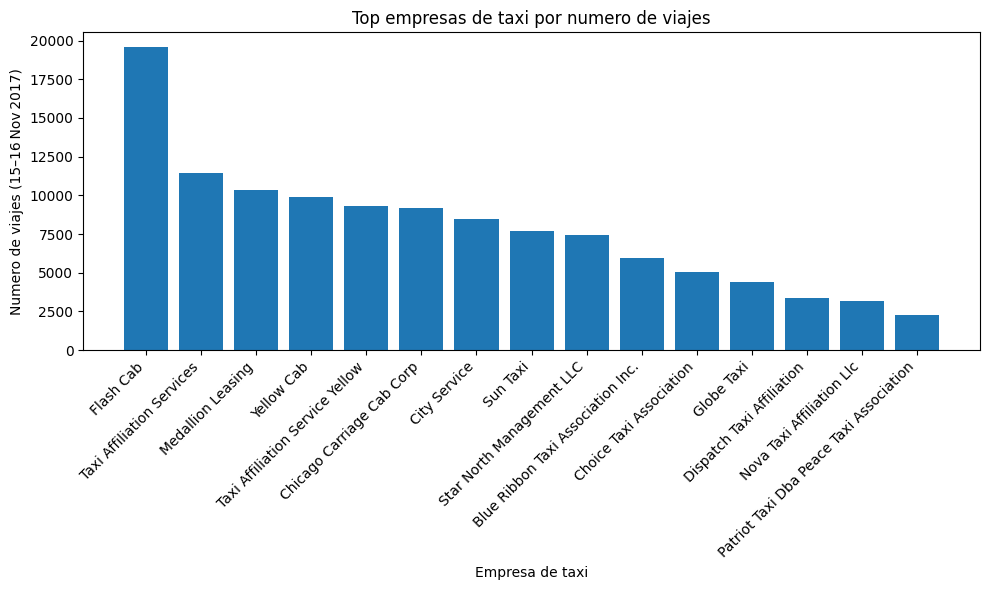

In [4]:
# Top taxi companies by trips (15‑16 Nov 2017)
top_companies = df_companies.sort_values('trips_amount', ascending=False).head(15)
print(top_companies)
plt.figure(figsize=(10, 6))
plt.bar(top_companies['company_name'], top_companies['trips_amount'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Empresa de taxi')
plt.ylabel('Numero de viajes (15–16 Nov 2017)')
plt.title('Top empresas de taxi por numero de viajes')
plt.tight_layout()
plt.show()



Destaca Flash Cab con casi el doble de trayectos que la siguiente, Taxi Affiliation Services, por si sola, concentra alrededor de una cuarta parte de todo el volumen registrado en esos dos días.

Las siguientes 7 empresas estan entre 6000 y 10000 viajes por lo cual mantienen cuotas respetables.

A partir de aqui existe una larga cola de pequeños operadores
Más allá del Top-10, la mayoría de las 64 empresas tiene volúmenes muy bajos. Esto indica fragmentación en la oferta: muchas licencias, poca escala individual.

#### Implicaciones para Zuber.

Cobertura: competir con Flash Cab exigirá una flota amplia o acuerdos de afiliación.

Estrategia: un posicionamiento nicho (p. ej. rutas aeropuerto–centro) o ventajas de precio/tecnología puede ser más viable que intentar batir a los líderes en volumen global.

### 4.5 Grafico los 10 barrios principales por número de finalizaciones

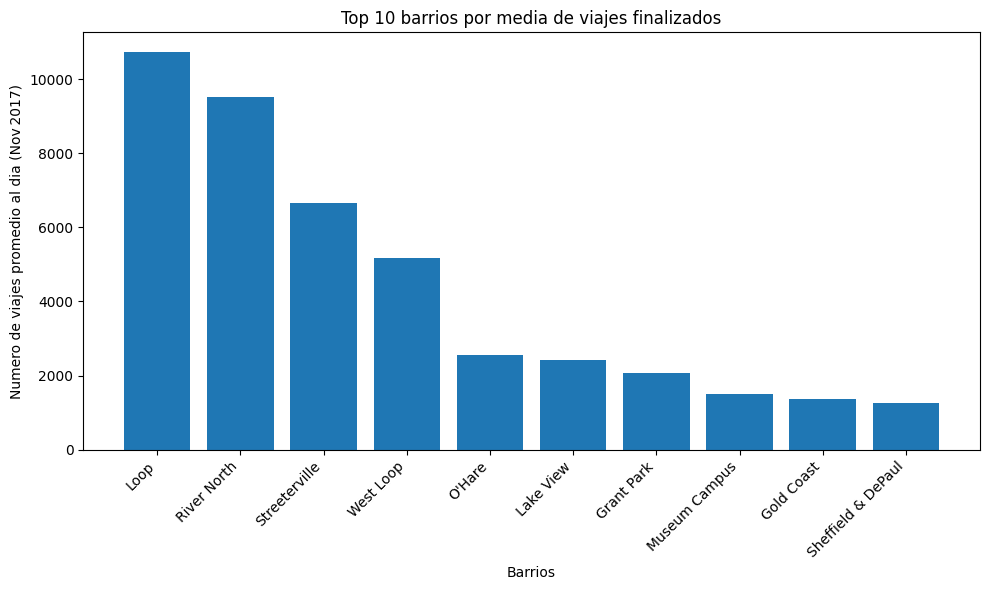

In [5]:
# Top 10 neighborhoods by average trip finalizations (Nov 2017)
plt.figure(figsize=(10, 6))
plt.bar(top10_neighborhoods['dropoff_location_name'], top10_neighborhoods['average_trips'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Barrios')
plt.ylabel('Numero de viajes promedio al dia (Nov 2017)')
plt.title('Top 10 barrios por media de viajes finalizados')
plt.tight_layout()
plt.show()

- Demanda ultraconcentrada en el centro.
Los cuatro primeros barrios —todos ubicados en Downtown— suman más de 41 000 viajes diarios en promedio, dominando la actividad de drop-off.
- O’Hare aparece en 5.º lugar, reflejando el peso de los traslados al aeropuerto.
- Caída pronunciada tras el Top-5.
Del 6.º al 10.º lugar la demanda baja hasta ~1 200-2 400 viajes/día; fuera del Top-10 muchos barrios quedan por debajo de los 500. Esto sugiere que optimizar la asignación de conductores en las zonas líderes puede mejorar la utilización de flota.
- Pautas de viaje previsibles.
    - Laboral: Loop y West Loop absorben gran parte del flujo en horas pico.
    - Turismo y ocio: River North, Streeterville destacan
- Implicaciones para Zuber.
    - Priorización geográfica: concentrar conductores en Loop-River North durante horas punta y tener un “corredor” dedicado hacia O’Hare.
    - Pricing dinámico: aplicar tarifas diferenciales donde la competencia sea menor (barrios fuera del Top-10) para incentivar conductores y equilibrar oferta-demanda.

# PASO 5 Prueba de hipótesis

In [6]:
# Cargamos el dataset
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df_weather)
df_weather.info()

# convertimos algunos datos a los mas adecuados
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])
df_weather['duration_minutes'] = df_weather['duration_seconds'] / 60 # convertimos a minutos

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts  

In [7]:
# Filtramos los sabados
df_sat = df_weather[df_weather['start_ts'].dt.dayofweek == 5]
print(df_sat)

# Dividimos en dias lluviosos vs despejado
rainy  = df_sat[df_sat['weather_conditions'] == 'Bad']['duration_minutes']
clear  = df_sat[df_sat['weather_conditions'] == 'Good']['duration_minutes']


                start_ts weather_conditions  duration_seconds  \
0    2017-11-25 16:00:00               Good            2410.0   
1    2017-11-25 14:00:00               Good            1920.0   
2    2017-11-25 12:00:00               Good            1543.0   
3    2017-11-04 10:00:00               Good            2512.0   
4    2017-11-11 07:00:00               Good            1440.0   
...                  ...                ...               ...   
1063 2017-11-25 11:00:00               Good               0.0   
1064 2017-11-11 10:00:00               Good            1318.0   
1065 2017-11-11 13:00:00               Good            2100.0   
1066 2017-11-11 08:00:00               Good            1380.0   
1067 2017-11-04 16:00:00                Bad            2834.0   

      duration_minutes  
0            40.166667  
1            32.000000  
2            25.716667  
3            41.866667  
4            24.000000  
...                ...  
1063          0.000000  
1064         21.966

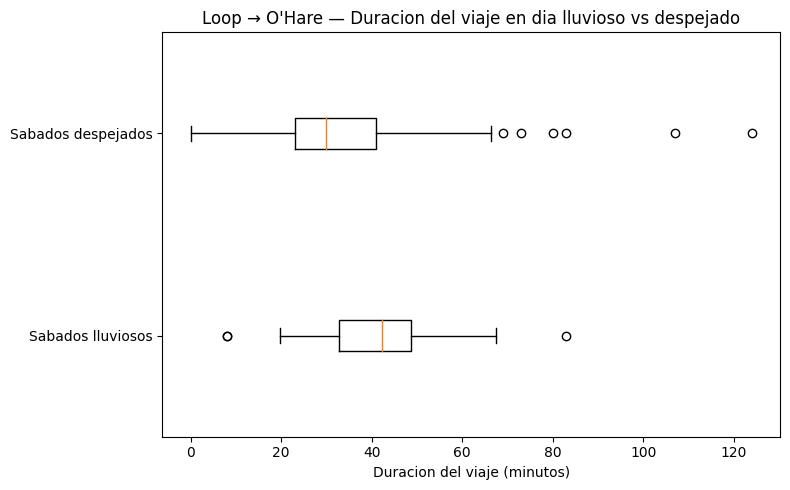

In [8]:
# Boxplot para comparar las distribuciones
plt.figure(figsize=(8, 5))
plt.boxplot([rainy, clear], labels=['Sabados lluviosos', 'Sabados despejados'], vert=False)
plt.xlabel('Duracion del viaje (minutos)')
plt.title("Loop \u2192 O'Hare — Duracion del viaje en dia lluvioso vs despejado")
plt.tight_layout()
plt.show()

De un vistazo podemos ver:

Mediana desplazada: la línea central (mediana) se ubica más a la derecha en días lluviosos, corroborando la media ~7 min mayor que encontramos con la prueba t.

Rango intercuartílico (IQR) algo similar, pero la caja lluviosa empieza más tarde y se extiende ligeramente más.

Más outliers extremos en sábados claros (quizá tráfico atípico por obras, eventos deportivos, etc.), aunque el “cuerpo” principal es más rápido que el de días lluviosos.

## Prueba la hipótesis

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
*(Duración de viajes Loop → O’Hare los sábados)*

### 1. Planteamiento de las hipótesis  

| Símbolo | Enunciado matemático                           | Interpretación en palabras |
|---------|------------------------------------------------|----------------------------|
| **H₀**  | $\mu_{\text{lluvioso}} = \mu_{\text{despejado}}$      | **Hipótesis nula:** la duración media de los viajes **no cambia** los sábados si llueve. |
| **H₁**  | $\mu_{\text{lluvioso}} \neq \mu_{\text{despejado}}$   | **Hipótesis alternativa (bilateral):** la duración media **sí cambia** cuando llueve en sábado. |

*Donde* $\mu_{\text{lluvioso}}$ *y* $\mu_{\text{despejado}}$ *son las medias de duración (min) en sábados lluviosos y despejados, respectivamente.*

---

### 2. Criterio de la prueba  

* **Prueba elegida:** **t-test de Welch** para muestras independientes.  
  *Justificación:*  
  * Dos grupos independientes (lluvioso vs. despejado).  
  * Tamaños de muestra distintos y varianzas potencialmente desiguales → Welch corrige esa diferencia.  
  * Variable cuantitativa (duración) y cada grupo con* n > 30*, por lo que la aproximación t es robusta (TLC).  
* **Nivel de significación:** $\alpha = 0.05$ (criterio estándar en análisis exploratorio).  
* **Regla de decisión:**  
  *Rechazar* H₀ *si* **p-valor < α**; aceptar H₀ en caso contrario.

In [9]:
# Welch-t (varianzas independientes, tamaños distintos)
t_stat, p_val = stats.ttest_ind(rainy, clear,
                                equal_var=False,   # Welch
                                nan_policy='omit') # ignora NaN si hubiera
alpha = 0.05
print(f'n_rainy  = {len(rainy)},  μ_rainy  = {rainy.mean():.2f} min')
print(f'n_clear  = {len(clear)},  μ_clear  = {clear.mean():.2f} min')
print(f'p-valor = {p_val:.4g}\n')

if p_val < alpha:
    print("Rechazamos la hipotesis nula, existe evidencia muy fuerte de que la duracion promedio de los viajes entre Loop -> O'Hare cambia los sabados lluviosos")
else:
    print("No rechazamos la hipotesis nula, no hay evidencia suficiente para decir que las medias sean diferentes los dias de lluvia")

n_rainy  = 180,  μ_rainy  = 40.45 min
n_clear  = 888,  μ_clear  = 33.33 min
p-valor = 6.739e-12

Rechazamos la hipotesis nula, existe evidencia muy fuerte de que la duracion promedio de los viajes entre Loop -> O'Hare cambia los sabados lluviosos


Existe evidencia muy fuerte de que la duración promedio de los viajes Loop → O’Hare cambia los sábados lluviosos.

#### Interpretación práctica
En la muestra, los trayectos bajo lluvia (40.5 min) duran ~7 min más que en condiciones normales (33.3 min) — ≈ 21 % de incremento.

Esto sugiere que, para planificar tiempos de recogida y precios dinámicos, Zuber debe considerar la lluvia como un factor importante los sábados en esta ruta.